In [161]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [162]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [163]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [164]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [165]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="mean")
si.fit(data.iloc[:, 9:10])
data.iloc[:, 9:10] = si.transform(data.iloc[:, 9:10])


In [166]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [167]:
cat_data = []
data_li = list(data.columns)
for i in data_li:
    if data[i].dtype == "object":
        cat_data.append(i)
cat_data

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [168]:
data = data.drop(data.index[502:], axis=0)

In [169]:
X= data.iloc[:, 1:-1]
y = data.iloc[:, -1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
497,Female,14.0,0,0,No,children,Rural,129.53,21.300000,never smoked
498,Female,15.0,0,0,No,children,Rural,114.53,29.100000,Unknown
499,Female,66.0,0,0,No,Private,Urban,93.73,23.900000,smokes
500,Female,56.0,0,0,Yes,Private,Urban,77.49,36.000000,formerly smoked


In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("ecoder", OneHotEncoder(), [0, 4, 5, 6, 9])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [171]:
X

array([[  0.        ,   1.        ,   0.        , ...,   1.        ,
        228.69      ,  36.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        202.21      ,  28.89323691],
       [  0.        ,   1.        ,   0.        , ...,   1.        ,
        105.92      ,  32.5       ],
       ...,
       [  1.        ,   0.        ,   1.        , ...,   0.        ,
         93.73      ,  23.9       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         77.49      ,  36.        ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         65.38      ,  41.2       ]])

In [172]:
X.shape

(502, 20)

In [173]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)



In [191]:
X_train.shape

(401, 20)

In [174]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs",max_iter=10000)
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)

In [175]:
from sklearn.metrics import mean_absolute_error, confusion_matrix
print(mean_absolute_error(y_test, y_predlr))
cm = confusion_matrix(y_test, y_predlr)
cm

0.33663366336633666


array([[35, 18],
       [16, 32]], dtype=int64)

c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

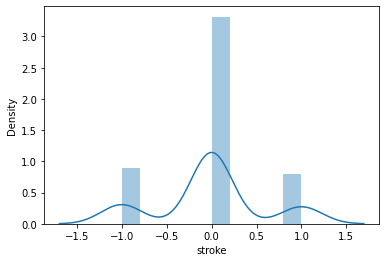

In [176]:
sns.distplot(y_test-y_predlr)

In [177]:
# from xgboost import XGBClassifier
# xg = XGBClassifier()
# xg.fit(X_train, y_train)
# y_predxg = xg.predict(X_test)

In [178]:
# s = xg.predict([[  0,           1,           0,           0,           1,
#     0,           0,           1,           0,           0,
#     1,           0,           0,           0,           1,
#     0,          80,           0,           1,         105.92,
#    32.5  ]])
# print(s)

In [179]:
# sns.distplot(y_test-y_predxg)

In [180]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_predxg)
# cm

In [181]:
# cm1 = confusion_matrix(y_test, y_predxg)
# cm1

In [182]:
# a = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =10)
# print(mean_absolute_error(y_test, y_predxg))
# print(a.mean())

In [183]:
a1= cross_val_score(estimator=lr, X=X_train, y=y_train, cv =10)
print(a1.mean())

0.7454878048780487


In [184]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)


In [185]:
a3 = cross_val_score(estimator=knn, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predknn))
print(a3.mean())

0.32673267326732675
0.6782926829268293


In [186]:
c = confusion_matrix(y_test, y_predknn)
c

array([[42, 11],
       [22, 26]], dtype=int64)

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test) 


In [188]:
z = confusion_matrix(y_test, y_predrf)
z

array([[36, 17],
       [10, 38]], dtype=int64)

In [189]:
a4= cross_val_score(estimator=rf, X=X_train, y=y_train, cv =10)
print(a4.mean())

0.7354878048780488
